<a href="https://colab.research.google.com/github/Carol-Nunes/Recommender-System/blob/main/Recommender_System_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
import tensorflow
from keras.applications.resnet50 import ResNet50, preprocess_input

In [3]:
model = ResNet50(weights = 'imagenet', include_top = False, input_shape = (224, 224, 3))
model.trainable=False

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
from keras.layers import GlobalMaxPooling2D
model = tensorflow.keras.Sequential([
    model,
    GlobalMaxPooling2D()
])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (None, 7, 7, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling2d                 │ (None, 2048)                │               0 │
│ (GlobalMaxPooling2D)                 │                             │                 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 23,587,712 (89.98 MB)

In [10]:
import cv2
import numpy as np
from numpy.linalg import norm

def extract_features(img_path, model):

    img = cv2.imread(img_path)
    img = cv2.resize(img, (224, 224))
    img = np.array(img)
    expand_img = np.expand_dims(img, axis=0)
    pre_processed_img = preprocess_input(expand_img)
    result = model.predict(pre_processed_img).flatten()
    normalized_result = result / norm(result)
    return normalized_result

In [15]:
import os
from tqdm import tqdm

filename = []
feature_list = []

for file in os.listdir('/content/drive/MyDrive/Recommender_system/Products'):
    filename.append(os.path.join('/content/drive/MyDrive/Recommender_system/Products', file))

In [16]:
for file in filename:
    feature_list.append(extract_features(file, model))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━

In [17]:
import pickle

pickle.dump(feature_list, open('/content/drive/MyDrive/Recommender_system/feature_list.pkl', 'wb'))
pickle.dump(filename, open('/content/drive/MyDrive/Recommender_system/filename.pkl', 'wb'))

# Teste

In [18]:
test_features = np.array(pickle.load(open('/content/drive/MyDrive/Recommender_system/feature_list.pkl', 'rb')))
test_filename = pickle.load(open('/content/drive/MyDrive/Recommender_system/filename.pkl', 'rb'))

In [19]:
from sklearn.neighbors import NearestNeighbors

neighbors = NearestNeighbors(n_neighbors=6, algorithm='brute', metric='euclidean')
neighbors.fit(test_features)

NearestNeighbors(algorithm='brute', metric='euclidean', n_neighbors=6)

Choiced Product


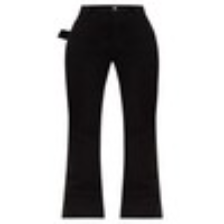

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


In [49]:
from google.colab.patches import cv2_imshow

test_img = cv2.imread('/content/drive/MyDrive/Recommender_system/P_0_ (201).jpg')
test_img = cv2.resize(test_img, (224, 224))
print("Choiced Product")
cv2_imshow(test_img)
test_img = np.array(test_img)
test_expand_img = np.expand_dims(test_img, axis=0)
test_pre_processed_img = preprocess_input(test_expand_img)
test_result = model.predict(test_pre_processed_img).flatten()
test_normalized_result = test_result / norm(test_result)


In [50]:
distances, indices = neighbors.kneighbors([test_normalized_result])

Recommended Products


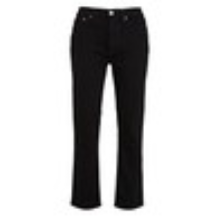

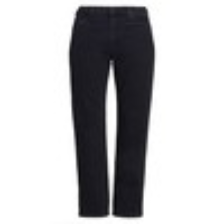

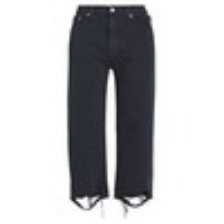

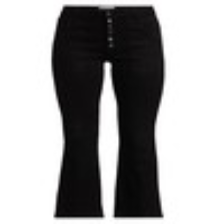

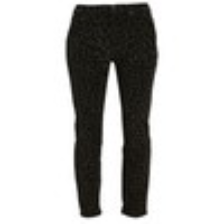

In [51]:
print("Recommended Products")

for file in indices[0][1:6]:
    temp_img = cv2.imread(test_filename[file])
    cv2_imshow(cv2.resize(temp_img, (224, 224)))